In [2]:
from py2neo import Graph

In [3]:
graph = Graph("bolt://localhost:7687", password="123")

# Setup

In [3]:
# Delete All Nodes
q = '''
MATCH (n)
DETACH DELETE n
'''
graph.run(q)

In [4]:
#define the index - only run this when you create the graph
q = '''
CREATE CONSTRAINT ON (u:Account) ASSERT u.Name IS UNIQUE;
'''

#graph.run(q)

# Create Graph

In [3]:
greece = ["anastasiaant7",
"Annoubi",
"ANTILIPSI",
"Avelline_",
"Axeloukos",
"Banned_lRL",
"BazeGR",
"blackfiction87",
"bugaimerGR",
"ChaniaLiveTV",
"ChinnJ",
"ControllerByte",
"ConvictoZ",
"daenap",
"DaskaYT",
"DD_Warrior_Lady",
"Decpina_Nez",
"DezDyy",
"Dom1nant1337",
"DRAGOMANVR",
"elmagician18",
"f3els98",
"Fonikibekatsa",
"FORG1VENAPM",
"GRamers",
"gre_frost",
"GucciKitty",
"HackyPixelz",
"Hareas",
"hqcM",
"HungryPandaLOL",
"iliasgrGaming",
"imisslethal_hs",
"immortalgre1",
"im_thewolf1",
"iusedtobefamousbuthen",
"J0J0C69",
"johnmits",
"Jordaneiro",
"JOZO_Y",
"JustSsInTime",
"kemalyoxd",
"l0wprofile",
"L1l1th12",
"ldlc_comp",
"LegitGamingGR",
"LoLHellas",
"M_aDaR_A",
"MadNaab",
"MadneyYT",
"MaZzzZGR",
"mitsigas",
"MordeKillGR",
"n1kos_300",
"Nooblet9",
"Oldschool",
"PantezzzzZ",
"pao_logan",
"paotasos13",
"PGC_S1",
"Piperakos",
"poul_maniac",
"Pun1shers_TV",
"Santova_",
"shad0wst3ps",
"SkyFrostTube",
"SLaki",
"sofini1",
"SonOfZeus_TV",
"SophieSensei",
"sparks200iq",
"Ste4VeN",
"Team_Boo",
"theMachoDude",
"Tholwmenos",
"TL_Nero",
"Totyz",
"Tsili6969",
"vaal_blade",
"VroukoS",
"Wea91",
"Wikip3diotGames",
"YoMaMaTivi",
"RantingGreekGamer",
"This_Is_LilO"]

In [6]:
len(greece)

85

In [5]:
q = '''
LOAD CSV WITH HEADERS FROM "file:/{streamer_name}.csv" AS row
MERGE (user:Account {{Name:row.from_name}})
MERGE (streamer:Account {{Name:row.to_name}})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {{date:datetime(row.followed_at)}}]->(streamer);
'''


#s = '''
#    MATCH (s:Account{{Name:'{name}'}})
#    SET s:Streamer
#    '''

for streamer in greece: #streamers[0:2]:
    qq = q.format(streamer_name=streamer)
    print("Running query for: ",streamer)
    #print(qq)
    graph.run(qq)
    #ss = s.format(name=streamer)
    #graph.run(ss)

Running query for:  anastasiaant7
Running query for:  Annoubi
Running query for:  ANTILIPSI
Running query for:  Avelline_
Running query for:  Axeloukos
Running query for:  Banned_lRL
Running query for:  BazeGR
Running query for:  blackfiction87
Running query for:  bugaimerGR
Running query for:  ChaniaLiveTV
Running query for:  ChinnJ
Running query for:  ControllerByte
Running query for:  ConvictoZ
Running query for:  daenap
Running query for:  DaskaYT
Running query for:  DD_Warrior_Lady
Running query for:  Decpina_Nez
Running query for:  DezDyy
Running query for:  Dom1nant1337
Running query for:  DRAGOMANVR
Running query for:  elmagician18
Running query for:  f3els98
Running query for:  Fonikibekatsa
Running query for:  FORG1VENAPM
Running query for:  GRamers
Running query for:  gre_frost
Running query for:  GucciKitty
Running query for:  HackyPixelz
Running query for:  Hareas
Running query for:  hqcM
Running query for:  HungryPandaLOL
Running query for:  iliasgrGaming
Running query fo

## Count Nodes

In [7]:
x = graph.run('MATCH (n) RETURN count(n)')

In [8]:
x.data()

[{'count(n)': 336369}]

In [9]:
graph.run('MATCH (n:Streamer) RETURN count(n)').data()

[{'count(n)': 85}]

## Other Queries 

In [28]:
import pandas as pd
dates = pd.date_range('2013-01-01','2019-02-01', 
              freq='3M').strftime("%Y-%m-%d").tolist()
len(dates)

25

## Overlap

In [11]:
# create overlap counts with date
for date in dates:
    q = '''
    MATCH (s1:Streamer)<-[f1:Follows]-(f:Account)-[f2:Follows]->(s2:Streamer)
    WHERE (NOT f:Streamer) and (f1.date < datetime('{date}')) and (f2.date < datetime('{date}')) 
    WITH s1,s2,COUNT(f) AS followers
    MERGE (s1)-[a:agg]->(s2)
    ON MATCH SET a.f_{date_field} = followers
    '''

    qq = q.format(date=date,date_field=date.replace("-","_"))
    #print(qq)
    print("Running query for: ",date)
    graph.run(qq)

Running query for:  2013-01-31
Running query for:  2013-04-30
Running query for:  2013-07-31
Running query for:  2013-10-31
Running query for:  2014-01-31
Running query for:  2014-04-30
Running query for:  2014-07-31
Running query for:  2014-10-31
Running query for:  2015-01-31
Running query for:  2015-04-30
Running query for:  2015-07-31
Running query for:  2015-10-31
Running query for:  2016-01-31
Running query for:  2016-04-30
Running query for:  2016-07-31
Running query for:  2016-10-31
Running query for:  2017-01-31
Running query for:  2017-04-30
Running query for:  2017-07-31
Running query for:  2017-10-31
Running query for:  2018-01-31
Running query for:  2018-04-30
Running query for:  2018-07-31
Running query for:  2018-10-31
Running query for:  2019-01-31


In [12]:
# create overlap counts
q = '''
MATCH (s1:Streamer)<-[f1:Follows]-(f:Account)-[f2:Follows]->(s2:Streamer)
WHERE NOT f:Streamer
WITH s1,s2,count(f) as followers
CREATE (s1)-[a:agg{f_count:followers}]->(s2)
'''
#graph.run(q)

# count followers per node
q = '''
MATCH (a:Account)-[f:Follows]->(b:Account)
WITH b,count(f) as followers
SET b.followers = followers
'''
#graph.run(q)

## Followers per date

In [13]:
# follower per date
q = '''
    MATCH (a:Account)-[f:Follows]->(b:Account)
    WHERE (f.date < datetime('{date}'))  
    WITH b,COUNT(f) AS followers
    SET b.followers_{date_field} = followers
    '''
    
for date in dates:
    qq = q.format(date=date,date_field=date.replace("-","_"))
    #print(qq)
    print("Running query for: ", date)

    graph.run(qq)

Running query for:  2013-01-31
Running query for:  2013-04-30
Running query for:  2013-07-31
Running query for:  2013-10-31
Running query for:  2014-01-31
Running query for:  2014-04-30
Running query for:  2014-07-31
Running query for:  2014-10-31
Running query for:  2015-01-31
Running query for:  2015-04-30
Running query for:  2015-07-31
Running query for:  2015-10-31
Running query for:  2016-01-31
Running query for:  2016-04-30
Running query for:  2016-07-31
Running query for:  2016-10-31
Running query for:  2017-01-31
Running query for:  2017-04-30
Running query for:  2017-07-31
Running query for:  2017-10-31
Running query for:  2018-01-31
Running query for:  2018-04-30
Running query for:  2018-07-31
Running query for:  2018-10-31
Running query for:  2019-01-31


## Community Detection

In [24]:
# identify communities
#                    

q_community_detection = '''
CALL algo.louvain('MATCH (a:Account)-[f:Follows]->(b:Account) 
                    WHERE (f.date < datetime("{date}"))
                    WITH DISTINCT collect(a)+collect(b) as n_list
                    UNWIND n_list as n
                    RETURN id(n) as id',
    'MATCH (a:Account)-[f:Follows]->(b:Account)
    WHERE (f.date < datetime("{date}"))  
    RETURN id(a) as source, id(b) as target',
  {{write:True, writeProperty:'community_{date_field}', graph:'Cypher'}})
YIELD nodes, communityCount, iterations, loadMillis, computeMillis, writeMillis;
'''

# get list of communities
q_communities = '''
MATCH (a:Streamer)
WHERE a.community_{date_field} > -1
RETURN DISTINCT a.community_{date_field} as Community
'''

# get streamer with higher centrality for that community
q_highest_dc = '''
    MATCH (a:Account)-[:Follows]->(s:Streamer)
    WHERE (a.community_{old_date_field} = {community}) AND (s.community_{old_date_field} = {community})
    WITH s,COUNT(a) as dc
    RETURN ID(s) as ID, dc as degree
    ORDER BY dc DESC
    LIMIT 1
    '''

q_community_node_count = '''
    MATCH (a:Account)-[:Follows]->(s:Streamer)
    WHERE (a.community_{date_field} = {community}) AND (s.community_{date_field} = {community})
    WITH DISTINCT COUNT(a) AS count
    RETURN count
'''

# get all streamers in new group community 
q_streamer_groups = '''
    MATCH (a:Account)-[:Follows]->(s:Streamer)
    WHERE (a.community_{new_date_field} > -1) AND (s.community_{new_date_field} > -1)
    WITH DISTINCT s as ss
    RETURN DISTINCT ss.community_{new_date_field} AS Community, COLLECT(ID(ss)) as ID
    '''

# reasign new communities     
q_find = '''
    MATCH (s:Streamer)
    WHERE ID(s) = {node_id}
    RETURN s.community_{new_date_field} AS Community
    '''

q_set = '''
    MATCH (a:Account)
    WHERE a.community_{new_date_field} = {get_community}
    SET a.community_{new_date_field} = {set_community}
    '''

In [29]:
from random import randint
# identify communities
old_date = dates[0]
qq = q_community_detection\
            .format(date=old_date,date_field=old_date.replace("-","_"))
graph.run(qq)

for date in dates[1:]:
    print("\nCommunity Detectiont for:",date)
    print("Previouse Date:", old_date)
    old_date_field = old_date.replace("-","_")
    
    # get list of communities
    qq = q_communities.format(date_field=old_date_field)
    data = graph.run(qq).data()
    
    communities_i0 = []
    for i in data:
        communities_i0.append(i.get("Community"))

    print("old communities:")
    print(communities_i0)

    # get streamer with higher centrality for that community in previouse step i0
    dc_details = {}
    dc_streamers = []
    for community in communities_i0:
        qq = q_highest_dc.format(community=community,
                                 old_date_field=old_date_field)
        data = graph.run(qq).data()

        s_id = data[0].get("ID")
        degree = data[0].get("degree")
        dc_streamers += [s_id]
        dc_details[s_id] = {"degree":degree,"community":community}

    print("Old Community Centers:")
    for k,v in dc_details.items():
        print(k,v)
        
    # identify communities
    print("Identifying Communities")
    new_date_field = date.replace("-","_")
    qq = q_community_detection\
                .format(date=date,date_field=new_date_field)
    graph.run(qq)

    # change new commuity numbers if they overlap with previouse step community #
    qq = q_communities.format(date_field=new_date_field)
    new_communities = graph.run(qq).data()
    
    communities_i1 = []
    for response in new_communities:
        communities_i1.append(response.get("Community"))
        
    community_intersection = set(communities_i1)\
                        .intersection(set(communities_i0))
    
    if len(community_intersection) > 1:
        for community in community_intersection:
            new_community = randint(50000,60000)
            qq = q_set.format(get_community=community,
                          set_community=new_community,
                             new_date_field=new_date_field)
            graph.run(qq)
    
    # get all streamers in new group community 
    qq = q_streamer_groups.format(new_date_field=new_date_field)
    community_nodes_i1 = graph.run(qq).data()

    print("Finding Overlap of New and Old Communities")
    merge_conflicts = []
    for community_node in community_nodes_i1:
        community = community_node.get("Community")
        node_ids = set(community_node.get("ID"))
        
        intersection = node_ids.intersection(set(dc_streamers))
        
        if len(intersection) > 1:
            print("##MERGE CONFLICT DETECTED###")
            merge_conflicts += [intersection]

    # which ever node @ time i0 with the community that has the most :Accounts(nodes) will win the merge conflict 
    if len(merge_conflicts) > 0:
        nodes_for_removal = []
        for conflict_pair in merge_conflicts:
            top_node = {
                "node_id":None,
                "community":None,
                "c_total_nodes":0
            }
            print("conflict set iteration")
            print(conflict_pair)
            for node_id in conflict_pair:                
                community_i0 = dc_details[node_id].get("community")
                
                qq = q_community_node_count.format(date_field=old_date_field,community=community_i0)
                c_total_nodes_i0 = graph.run(qq).data()[0].get("count")
                
                print("Community:",community_i0, "|Node Count",c_total_nodes_i0,"for node",node_id)
                
                if top_node.get("c_total_nodes") < c_total_nodes_i0:
                    top_node["node_id"] = node_id
                    top_node["community"] = community_i0
                    top_node["c_total_nodes"] = c_total_nodes_i0
            
            nodes_for_removal += conflict_pair.difference([top_node.get("node_id")])
        
        print("Nodes for Removal",nodes_for_removal)
        
        #remove nodes
        for node in nodes_for_removal:
            print("pre-removal",dc_details)
            dc_details.pop(node)
            print("post-remocal",dc_details)
        
         
            
    # reasign new communities     
    print("Reasiging Communities")
    for k,v in dc_details.items():
        community_i0 = v.get("community")
        qq = q_find.format(node_id=str(k),new_date_field=new_date_field)
        community_i1 = graph.run(qq).data()[0].get("Community")
        
        print("OLD:------------------------------------")        
        print("ID",k,"old c:",community_i0,"New c:",community_i1)
        
        qq = q_set.format(get_community=community_i1,
                          set_community=community_i0,
                             new_date_field=new_date_field)

        graph.run(qq)
        
    old_date = date


Community Detectiont for: 2013-04-30
Previouse Date: 2013-01-31
old communities:
[4, 1, 2, 0]
Old Community Centers:
286872 {'degree': 2, 'community': 4}
291281 {'degree': 153, 'community': 1}
305067 {'degree': 2, 'community': 2}
310999 {'degree': 3, 'community': 0}
Identifying Communities
Finding Overlap of New and Old Communities
Reasiging Communities
OLD:------------------------------------
ID 286872 old c: 4 New c: 6
OLD:------------------------------------
ID 291281 old c: 1 New c: 55484
OLD:------------------------------------
ID 305067 old c: 2 New c: 3
OLD:------------------------------------
ID 310999 old c: 0 New c: 54506

Community Detectiont for: 2013-07-31
Previouse Date: 2013-04-30
old communities:
[4, 1, 2, 0]
Old Community Centers:
286872 {'degree': 101, 'community': 4}
291281 {'degree': 232, 'community': 1}
305067 {'degree': 3, 'community': 2}
310999 {'degree': 36, 'community': 0}
Identifying Communities
Finding Overlap of New and Old Communities
Reasiging Communities

Finding Overlap of New and Old Communities
##MERGE CONFLICT DETECTED###
##MERGE CONFLICT DETECTED###
##MERGE CONFLICT DETECTED###
conflict set iteration
{310098, 205470}
Community: 53940 |Node Count 594 for node 310098
Community: 94 |Node Count 1053 for node 205470
conflict set iteration
{209496, 307909}
Community: 3 |Node Count 1882 for node 209496
Community: 56536 |Node Count 496 for node 307909
conflict set iteration
{286872, 291281}
Community: 4 |Node Count 1736 for node 286872
Community: 1 |Node Count 2128 for node 291281
Nodes for Removal [310098, 307909, 286872]
pre-removal {64248: {'degree': 1, 'community': 276}, 160817: {'degree': 1512, 'community': 151}, 205470: {'degree': 1053, 'community': 94}, 209496: {'degree': 1794, 'community': 3}, 286872: {'degree': 1736, 'community': 4}, 291281: {'degree': 2128, 'community': 1}, 291557: {'degree': 3158, 'community': 58790}, 291708: {'degree': 577, 'community': 3520}, 305067: {'degree': 3, 'community': 2}, 307909: {'degree': 496, 'comm

OLD:------------------------------------
ID 160817 old c: 151 New c: 8
OLD:------------------------------------
ID 205470 old c: 94 New c: 3220
OLD:------------------------------------
ID 208308 old c: 13590 New c: 19072
OLD:------------------------------------
ID 209496 old c: 3 New c: 55358
OLD:------------------------------------
ID 291281 old c: 1 New c: 615
OLD:------------------------------------
ID 291557 old c: 58790 New c: 613
OLD:------------------------------------
ID 300789 old c: 269 New c: 381
OLD:------------------------------------
ID 305067 old c: 2 New c: 2323
OLD:------------------------------------
ID 308596 old c: 264 New c: 27
OLD:------------------------------------
ID 309683 old c: 227 New c: 439
OLD:------------------------------------
ID 310999 old c: 0 New c: 20
OLD:------------------------------------
ID 313370 old c: 397 New c: 718
OLD:------------------------------------
ID 326729 old c: 59305 New c: 59240
OLD:------------------------------------
ID 334559

OLD:------------------------------------
ID 160817 old c: 151 New c: 3
OLD:------------------------------------
ID 205470 old c: 94 New c: 4914
OLD:------------------------------------
ID 208193 old c: 2550 New c: 2736
OLD:------------------------------------
ID 291281 old c: 1 New c: 789
OLD:------------------------------------
ID 291557 old c: 58790 New c: 787
OLD:------------------------------------
ID 294684 old c: 2530 New c: 2715
OLD:------------------------------------
ID 305067 old c: 2 New c: 2730
OLD:------------------------------------
ID 306699 old c: 264 New c: 57386
OLD:------------------------------------
ID 309683 old c: 227 New c: 40
OLD:------------------------------------
ID 310098 old c: 51725 New c: 59561
OLD:------------------------------------
ID 310999 old c: 0 New c: 13
OLD:------------------------------------
ID 313370 old c: 397 New c: 908
OLD:------------------------------------
ID 326729 old c: 59305 New c: 50633
OLD:------------------------------------
ID 

OLD:------------------------------------
ID 313510 old c: 2454 New c: 2569
OLD:------------------------------------
ID 326729 old c: 59305 New c: 53028
OLD:------------------------------------
ID 334559 old c: 398 New c: 1019

Community Detectiont for: 2016-07-31
Previouse Date: 2016-04-30
old communities:
[276, 151, 1, 2550, 58790, 397, 2530, 2, 264, 810, 227, 51725, 0, 2454, 3, 3180, 59305, 398]
Old Community Centers:
64248 {'degree': 2, 'community': 276}
160817 {'degree': 10129, 'community': 151}
291281 {'degree': 10963, 'community': 1}
208193 {'degree': 5, 'community': 2550}
291557 {'degree': 13266, 'community': 58790}
291708 {'degree': 5358, 'community': 397}
294684 {'degree': 522, 'community': 2530}
305067 {'degree': 3, 'community': 2}
306699 {'degree': 2669, 'community': 264}
307909 {'degree': 1870, 'community': 810}
309683 {'degree': 809, 'community': 227}
310098 {'degree': 5786, 'community': 51725}
310999 {'degree': 4892, 'community': 0}
313510 {'degree': 376, 'community': 245

Community: 1 |Node Count 24151 for node 291281
Community: 397 |Node Count 9286 for node 291708
Nodes for Removal [291708]
pre-removal {64248: {'degree': 2, 'community': 276}, 160817: {'degree': 12819, 'community': 151}, 291281: {'degree': 11484, 'community': 1}, 208193: {'degree': 5, 'community': 2550}, 291557: {'degree': 18522, 'community': 58790}, 291708: {'degree': 6634, 'community': 397}, 294684: {'degree': 1809, 'community': 2530}, 307909: {'degree': 2188, 'community': 810}, 306663: {'degree': 1, 'community': 1096}, 306699: {'degree': 3684, 'community': 264}, 309683: {'degree': 1271, 'community': 227}, 310098: {'degree': 6767, 'community': 51725}, 310999: {'degree': 5334, 'community': 0}, 313510: {'degree': 501, 'community': 2454}, 313691: {'degree': 13, 'community': 3180}, 326729: {'degree': 4306, 'community': 59305}}
post-remocal {64248: {'degree': 2, 'community': 276}, 160817: {'degree': 12819, 'community': 151}, 291281: {'degree': 11484, 'community': 1}, 208193: {'degree': 5, 

OLD:------------------------------------
ID 307909 old c: 810 New c: 13
OLD:------------------------------------
ID 306663 old c: 1096 New c: 1574
OLD:------------------------------------
ID 310098 old c: 51725 New c: 2
OLD:------------------------------------
ID 310999 old c: 0 New c: 9
OLD:------------------------------------
ID 313691 old c: 3180 New c: 4990

Community Detectiont for: 2017-04-30
Previouse Date: 2017-01-31
old communities:
[276, 151, 1, 264, 227, 58790, 810, 2530, 1096, 51725, 0, 3180]
Old Community Centers:
64248 {'degree': 2, 'community': 276}
160817 {'degree': 18315, 'community': 151}
291281 {'degree': 16884, 'community': 1}
308596 {'degree': 5838, 'community': 264}
309683 {'degree': 2271, 'community': 227}
291557 {'degree': 20319, 'community': 58790}
307909 {'degree': 2858, 'community': 810}
294684 {'degree': 1935, 'community': 2530}
306663 {'degree': 2, 'community': 1096}
310098 {'degree': 7775, 'community': 51725}
310999 {'degree': 7047, 'community': 0}
313691 

OLD:------------------------------------
ID 160817 old c: 151 New c: 4
OLD:------------------------------------
ID 308596 old c: 264 New c: 55856
OLD:------------------------------------
ID 291281 old c: 1 New c: 2834
OLD:------------------------------------
ID 309683 old c: 227 New c: 58590
OLD:------------------------------------
ID 307326 old c: 810 New c: 10
OLD:------------------------------------
ID 294684 old c: 2530 New c: 4742
OLD:------------------------------------
ID 300298 old c: 6945 New c: 8444
OLD:------------------------------------
ID 305067 old c: 4209 New c: 5013
OLD:------------------------------------
ID 306663 old c: 1096 New c: 2775
OLD:------------------------------------
ID 310098 old c: 51725 New c: 2
OLD:------------------------------------
ID 310999 old c: 0 New c: 51014
OLD:------------------------------------
ID 313691 old c: 3180 New c: 949

Community Detectiont for: 2018-01-31
Previouse Date: 2017-10-31
old communities:
[58790, 151, 264, 3180, 1, 227, 8

OLD:------------------------------------
ID 307326 old c: 810 New c: 13
OLD:------------------------------------
ID 294684 old c: 2530 New c: 5061
OLD:------------------------------------
ID 300298 old c: 6945 New c: 9396
OLD:------------------------------------
ID 305067 old c: 4209 New c: 50262
OLD:------------------------------------
ID 310999 old c: 0 New c: 5
OLD:------------------------------------
ID 335418 old c: 2510 New c: 2713

Community Detectiont for: 2018-04-30
Previouse Date: 2018-01-31
old communities:
[1, 151, 810, 227, 4209, 4, 2530, 6945, 0, 3180, 2510]
Old Community Centers:
291557 {'degree': 42599, 'community': 1}
160817 {'degree': 24913, 'community': 151}
307326 {'degree': 6755, 'community': 810}
306699 {'degree': 9830, 'community': 227}
309683 {'degree': 5487, 'community': 4209}
209496 {'degree': 6852, 'community': 4}
294684 {'degree': 2818, 'community': 2530}
300298 {'degree': 12, 'community': 6945}
310999 {'degree': 8241, 'community': 0}
313691 {'degree': 35118

OLD:------------------------------------
ID 160817 old c: 151 New c: 26
OLD:------------------------------------
ID 308596 old c: 3055 New c: 12
OLD:------------------------------------
ID 310999 old c: 0 New c: 0
OLD:------------------------------------
ID 306699 old c: 227 New c: 4
OLD:------------------------------------
ID 309683 old c: 4209 New c: 2
OLD:------------------------------------
ID 209496 old c: 17 New c: 24
OLD:------------------------------------
ID 307326 old c: 810 New c: 15
OLD:------------------------------------
ID 294684 old c: 2530 New c: 6263
OLD:------------------------------------
ID 313691 old c: 3180 New c: 13876

Community Detectiont for: 2019-01-31
Previouse Date: 2018-10-31
old communities:
[1, 151, 227, 0, 4209, 17, 2530, 810, 3055, 3180]
Old Community Centers:
291557 {'degree': 45476, 'community': 1}
160817 {'degree': 23601, 'community': 151}
306699 {'degree': 15040, 'community': 227}
310999 {'degree': 10696, 'community': 0}
309683 {'degree': 7108, 'c

In [35]:
q = '''
CALL algo.louvain('MATCH (a:Account)-[f:Follows]->(b:Account) 
                    WHERE (f.date < datetime("{date}")) 
                    WITH DISTINCT collect(a)+collect(b) as n_list
                    UNWIND n_list as n
                    RETURN id(n) as id',
    'MATCH (a:Account)-[f:Follows]->(b:Account)
    WHERE (f.date < datetime("{date}"))  
    RETURN id(a) as source, id(b) as target',
  {{write:True, writeProperty:'community_s', graph:'Cypher'}})
YIELD nodes, communityCount, iterations, loadMillis, computeMillis, writeMillis;
'''

date = "2014-04-30"
new_date_field = date.replace("-","_")
qq = q\
            .format(date=date,date_field=new_date_field)
graph.run(qq)

In [ ]:
# get views between two streamers
'''
MATCH (s1:Streamer{Name:'SonOfZeus_TV'})<-[:Follows]-(a:Account)-[:Follows]->(s2:Streamer{Name:'Fonikibekatsa'})
WHERE NOT a:Streamer
RETURN s1,s2,a
LIMIT 50;
'''

In [286]:
# export graph
#CALL apoc.export.graphml.all('/tmp/complete-graph.graphml', {useTypes:true, storeNodeIds:false})

q = '''
CALL apoc.export.graphml.query('MATCH (s1:Streamer)-[a:agg]->(s2:Streamer) RETURN s1,a','/Users/jeroen/Downloads/graph_communities_5.graphml',{useTypes:true, storeNodeIds:false})
'''
graph.run(q)

In [29]:
! pwd

/Users/jeroen/repos/twitch-graph-analysis/Notebooks


## Get Files

In [8]:
import pandas as pd
x = "/Users/jeroen/Library/Application Support/Neo4j Desktop/Application/neo4jDatabases/database-cd15ba45-6933-46a1-bd36-b9fcd973a1a8/installation-3.5.3/import/This_Is_LilO.csv"
df = pd.read_csv(x)

In [20]:
pd.unique(df.from_name).shape

(13447,)

In [21]:
df.shape

(23347, 5)

# Format XML

In [1]:
for n in root.findall(".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}edges/{http://www.gexf.net/1.3}edge/{http://www.gexf.net/1.3}attvalues/")[0:2]:
    x = n.attrib
    print(n.attrib)

NameError: name 'root' is not defined

In [130]:
#doc = etree.parse("/Users/jeroen/Downloads/graphs/overlap_aggs.gexf")
#etree.ElementTree(doc.getroot()).write("/Users/jeroen/Downloads/graphs/overlap_aggs_test.gexf",
#                                       encoding="UTF-8",
#                                       xml_declaration=True)

In [ ]:
tree.write()

In [160]:
#tree = etree.parse('/Users/jeroen/Downloads/overlap_aggs.gexf')
#tree.write("/Users/jeroen/Downloads/overlap_aggs_test.gexf",
#           with_tail=True,encoding="UTF-8",xml_declaration=True,method="html")

In [296]:
date_d = {}
ii = 1
for i in dates:
    date_d[i] = ii
    ii +=1
    
date_d

{'2013-01-31': 1,
 '2013-04-30': 2,
 '2013-07-31': 3,
 '2013-10-31': 4,
 '2014-01-31': 5,
 '2014-04-30': 6,
 '2014-07-31': 7,
 '2014-10-31': 8,
 '2015-01-31': 9,
 '2015-04-30': 10,
 '2015-07-31': 11,
 '2015-10-31': 12,
 '2016-01-31': 13,
 '2016-04-30': 14,
 '2016-07-31': 15,
 '2016-10-31': 16,
 '2017-01-31': 17,
 '2017-04-30': 18,
 '2017-07-31': 19,
 '2017-10-31': 20,
 '2018-01-31': 21,
 '2018-04-30': 22,
 '2018-07-31': 23,
 '2018-10-31': 24,
 '2019-01-31': 25}

In [297]:
xpath = ".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}edges/{http://www.gexf.net/1.3}edge/{http://www.gexf.net/1.3}attvalues/"


In [298]:
from lxml import etree
tree = etree.parse('/Users/jeroen/Downloads/graph_communities_5.gexf')
root = tree.getroot()

for n in root.findall(xpath):
    d = n.attrib
    date = d["for"]
    date_formated = date.replace('f_','').replace("_","-")
    d["for"] = "weight"
    d["timestamp"] = str(date_d.get(date_formated))
    print(d)

{'for': 'weight', 'value': '355', 'timestamp': '11'}
{'for': 'weight', 'value': '471', 'timestamp': '17'}
{'for': 'weight', 'value': '65', 'timestamp': '8'}
{'for': 'weight', 'value': '653', 'timestamp': '23'}
{'for': 'weight', 'value': '612', 'timestamp': '20'}
{'for': 'weight', 'value': '11', 'timestamp': '6'}
{'for': 'weight', 'value': '130', 'timestamp': '10'}
{'for': 'weight', 'value': '369', 'timestamp': '12'}
{'for': 'weight', 'value': '395', 'timestamp': '13'}
{'for': 'weight', 'value': '1092', 'timestamp': '24'}
{'for': 'weight', 'value': '1191', 'timestamp': '25'}
{'for': 'weight', 'value': '633', 'timestamp': '22'}
{'for': 'weight', 'value': '42', 'timestamp': '7'}
{'for': 'weight', 'value': '398', 'timestamp': '14'}
{'for': 'weight', 'value': '542', 'timestamp': '19'}
{'for': 'weight', 'value': '108', 'timestamp': '9'}
{'for': 'weight', 'value': '626', 'timestamp': '21'}
{'for': 'weight', 'value': '523', 'timestamp': '18'}
{'for': 'weight', 'value': '439', 'timestamp': '15'

{'for': 'weight', 'value': '536', 'timestamp': '17'}
{'for': 'weight', 'value': '256', 'timestamp': '8'}
{'for': 'weight', 'value': '578', 'timestamp': '23'}
{'for': 'weight', 'value': '567', 'timestamp': '20'}
{'for': 'weight', 'value': '133', 'timestamp': '6'}
{'for': 'weight', 'value': '372', 'timestamp': '10'}
{'for': 'weight', 'value': '432', 'timestamp': '12'}
{'for': 'weight', 'value': '446', 'timestamp': '13'}
{'for': 'weight', 'value': '583', 'timestamp': '24'}
{'for': 'weight', 'value': '584', 'timestamp': '25'}
{'for': 'weight', 'value': '574', 'timestamp': '22'}
{'for': 'weight', 'value': '203', 'timestamp': '7'}
{'for': 'weight', 'value': '460', 'timestamp': '14'}
{'for': 'weight', 'value': '554', 'timestamp': '19'}
{'for': 'weight', 'value': '332', 'timestamp': '9'}
{'for': 'weight', 'value': '573', 'timestamp': '21'}
{'for': 'weight', 'value': '25', 'timestamp': '4'}
{'for': 'weight', 'value': '549', 'timestamp': '18'}
{'for': 'weight', 'value': '490', 'timestamp': '15'}

{'for': 'weight', 'value': '124', 'timestamp': '20'}
{'for': 'weight', 'value': '1', 'timestamp': '13'}
{'for': 'weight', 'value': '189', 'timestamp': '24'}
{'for': 'weight', 'value': '198', 'timestamp': '25'}
{'for': 'weight', 'value': '163', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '14'}
{'for': 'weight', 'value': '107', 'timestamp': '19'}
{'for': 'weight', 'value': '139', 'timestamp': '21'}
{'for': 'weight', 'value': '89', 'timestamp': '18'}
{'for': 'weight', 'value': '1', 'timestamp': '15'}
{'for': 'weight', 'value': '8', 'timestamp': '16'}
{'for': 'weight', 'value': '69', 'timestamp': '17'}
{'for': 'weight', 'value': '175', 'timestamp': '23'}
{'for': 'weight', 'value': '146', 'timestamp': '20'}
{'for': 'weight', 'value': '1', 'timestamp': '13'}
{'for': 'weight', 'value': '183', 'timestamp': '24'}
{'for': 'weight', 'value': '187', 'timestamp': '25'}
{'for': 'weight', 'value': '170', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '14'}
{'for':

{'for': 'weight', 'value': '762', 'timestamp': '23'}
{'for': 'weight', 'value': '619', 'timestamp': '20'}
{'for': 'weight', 'value': '3', 'timestamp': '10'}
{'for': 'weight', 'value': '3', 'timestamp': '12'}
{'for': 'weight', 'value': '4', 'timestamp': '13'}
{'for': 'weight', 'value': '771', 'timestamp': '24'}
{'for': 'weight', 'value': '834', 'timestamp': '25'}
{'for': 'weight', 'value': '742', 'timestamp': '22'}
{'for': 'weight', 'value': '5', 'timestamp': '14'}
{'for': 'weight', 'value': '543', 'timestamp': '19'}
{'for': 'weight', 'value': '687', 'timestamp': '21'}
{'for': 'weight', 'value': '399', 'timestamp': '18'}
{'for': 'weight', 'value': '5', 'timestamp': '15'}
{'for': 'weight', 'value': '6', 'timestamp': '16'}
{'for': 'weight', 'value': '2', 'timestamp': '11'}
{'for': 'weight', 'value': '211', 'timestamp': '17'}
{'for': 'weight', 'value': '248', 'timestamp': '23'}
{'for': 'weight', 'value': '235', 'timestamp': '20'}
{'for': 'weight', 'value': '2', 'timestamp': '10'}
{'for': '

{'for': 'weight', 'value': '2', 'timestamp': '15'}
{'for': 'weight', 'value': '3', 'timestamp': '16'}
{'for': 'weight', 'value': '286', 'timestamp': '11'}
{'for': 'weight', 'value': '1160', 'timestamp': '17'}
{'for': 'weight', 'value': '2380', 'timestamp': '23'}
{'for': 'weight', 'value': '1659', 'timestamp': '20'}
{'for': 'weight', 'value': '346', 'timestamp': '12'}
{'for': 'weight', 'value': '461', 'timestamp': '13'}
{'for': 'weight', 'value': '4429', 'timestamp': '24'}
{'for': 'weight', 'value': '5094', 'timestamp': '25'}
{'for': 'weight', 'value': '2222', 'timestamp': '22'}
{'for': 'weight', 'value': '533', 'timestamp': '14'}
{'for': 'weight', 'value': '1464', 'timestamp': '19'}
{'for': 'weight', 'value': '1903', 'timestamp': '21'}
{'for': 'weight', 'value': '1360', 'timestamp': '18'}
{'for': 'weight', 'value': '813', 'timestamp': '15'}
{'for': 'weight', 'value': '1060', 'timestamp': '16'}
{'for': 'weight', 'value': '91', 'timestamp': '11'}
{'for': 'weight', 'value': '2140', 'times

{'for': 'weight', 'value': '270', 'timestamp': '23'}
{'for': 'weight', 'value': '233', 'timestamp': '20'}
{'for': 'weight', 'value': '1', 'timestamp': '13'}
{'for': 'weight', 'value': '322', 'timestamp': '24'}
{'for': 'weight', 'value': '1079', 'timestamp': '25'}
{'for': 'weight', 'value': '266', 'timestamp': '22'}
{'for': 'weight', 'value': '4', 'timestamp': '14'}
{'for': 'weight', 'value': '178', 'timestamp': '19'}
{'for': 'weight', 'value': '241', 'timestamp': '21'}
{'for': 'weight', 'value': '79', 'timestamp': '18'}
{'for': 'weight', 'value': '16', 'timestamp': '15'}
{'for': 'weight', 'value': '16', 'timestamp': '16'}
{'for': 'weight', 'value': '67', 'timestamp': '17'}
{'for': 'weight', 'value': '525', 'timestamp': '23'}
{'for': 'weight', 'value': '445', 'timestamp': '20'}
{'for': 'weight', 'value': '5', 'timestamp': '13'}
{'for': 'weight', 'value': '636', 'timestamp': '24'}
{'for': 'weight', 'value': '1346', 'timestamp': '25'}
{'for': 'weight', 'value': '482', 'timestamp': '22'}
{

{'for': 'weight', 'value': '2564', 'timestamp': '23'}
{'for': 'weight', 'value': '1999', 'timestamp': '20'}
{'for': 'weight', 'value': '2709', 'timestamp': '24'}
{'for': 'weight', 'value': '2821', 'timestamp': '25'}
{'for': 'weight', 'value': '2481', 'timestamp': '22'}
{'for': 'weight', 'value': '33', 'timestamp': '14'}
{'for': 'weight', 'value': '1677', 'timestamp': '19'}
{'for': 'weight', 'value': '2279', 'timestamp': '21'}
{'for': 'weight', 'value': '1515', 'timestamp': '18'}
{'for': 'weight', 'value': '289', 'timestamp': '15'}
{'for': 'weight', 'value': '777', 'timestamp': '16'}
{'for': 'weight', 'value': '104', 'timestamp': '17'}
{'for': 'weight', 'value': '2336', 'timestamp': '23'}
{'for': 'weight', 'value': '366', 'timestamp': '20'}
{'for': 'weight', 'value': '2699', 'timestamp': '24'}
{'for': 'weight', 'value': '3110', 'timestamp': '25'}
{'for': 'weight', 'value': '1825', 'timestamp': '22'}
{'for': 'weight', 'value': '22', 'timestamp': '14'}
{'for': 'weight', 'value': '315', 't

{'for': 'weight', 'value': '13', 'timestamp': '24'}
{'for': 'weight', 'value': '213', 'timestamp': '25'}
{'for': 'weight', 'value': '9', 'timestamp': '22'}
{'for': 'weight', 'value': '2', 'timestamp': '19'}
{'for': 'weight', 'value': '9', 'timestamp': '21'}
{'for': 'weight', 'value': '2', 'timestamp': '18'}
{'for': 'weight', 'value': '1', 'timestamp': '15'}
{'for': 'weight', 'value': '2', 'timestamp': '16'}
{'for': 'weight', 'value': '4', 'timestamp': '17'}
{'for': 'weight', 'value': '17', 'timestamp': '23'}
{'for': 'weight', 'value': '9', 'timestamp': '20'}
{'for': 'weight', 'value': '18', 'timestamp': '24'}
{'for': 'weight', 'value': '137', 'timestamp': '25'}
{'for': 'weight', 'value': '12', 'timestamp': '22'}
{'for': 'weight', 'value': '4', 'timestamp': '19'}
{'for': 'weight', 'value': '11', 'timestamp': '21'}
{'for': 'weight', 'value': '4', 'timestamp': '18'}
{'for': 'weight', 'value': '1', 'timestamp': '15'}
{'for': 'weight', 'value': '4', 'timestamp': '16'}
{'for': 'weight', 'val

{'for': 'weight', 'value': '371', 'timestamp': '25'}
{'for': 'weight', 'value': '185', 'timestamp': '22'}
{'for': 'weight', 'value': '62', 'timestamp': '19'}
{'for': 'weight', 'value': '119', 'timestamp': '21'}
{'for': 'weight', 'value': '60', 'timestamp': '18'}
{'for': 'weight', 'value': '53', 'timestamp': '16'}
{'for': 'weight', 'value': '105', 'timestamp': '17'}
{'for': 'weight', 'value': '165', 'timestamp': '23'}
{'for': 'weight', 'value': '160', 'timestamp': '20'}
{'for': 'weight', 'value': '167', 'timestamp': '24'}
{'for': 'weight', 'value': '168', 'timestamp': '25'}
{'for': 'weight', 'value': '162', 'timestamp': '22'}
{'for': 'weight', 'value': '150', 'timestamp': '19'}
{'for': 'weight', 'value': '162', 'timestamp': '21'}
{'for': 'weight', 'value': '120', 'timestamp': '18'}
{'for': 'weight', 'value': '67', 'timestamp': '16'}
{'for': 'weight', 'value': '4', 'timestamp': '17'}
{'for': 'weight', 'value': '165', 'timestamp': '23'}
{'for': 'weight', 'value': '4', 'timestamp': '20'}
{

{'for': 'weight', 'value': '1513', 'timestamp': '25'}
{'for': 'weight', 'value': '182', 'timestamp': '22'}
{'for': 'weight', 'value': '3', 'timestamp': '19'}
{'for': 'weight', 'value': '3', 'timestamp': '21'}
{'for': 'weight', 'value': '2', 'timestamp': '18'}
{'for': 'weight', 'value': '1', 'timestamp': '16'}
{'for': 'weight', 'value': '2', 'timestamp': '17'}
{'for': 'weight', 'value': '338', 'timestamp': '23'}
{'for': 'weight', 'value': '2', 'timestamp': '20'}
{'for': 'weight', 'value': '645', 'timestamp': '24'}
{'for': 'weight', 'value': '1966', 'timestamp': '25'}
{'for': 'weight', 'value': '101', 'timestamp': '22'}
{'for': 'weight', 'value': '2', 'timestamp': '19'}
{'for': 'weight', 'value': '2', 'timestamp': '21'}
{'for': 'weight', 'value': '2', 'timestamp': '18'}
{'for': 'weight', 'value': '2', 'timestamp': '16'}
{'for': 'weight', 'value': '1', 'timestamp': '17'}
{'for': 'weight', 'value': '224', 'timestamp': '23'}
{'for': 'weight', 'value': '2', 'timestamp': '20'}
{'for': 'weight

{'for': 'weight', 'value': '12', 'timestamp': '23'}
{'for': 'weight', 'value': '11', 'timestamp': '20'}
{'for': 'weight', 'value': '13', 'timestamp': '24'}
{'for': 'weight', 'value': '13', 'timestamp': '25'}
{'for': 'weight', 'value': '12', 'timestamp': '22'}
{'for': 'weight', 'value': '11', 'timestamp': '19'}
{'for': 'weight', 'value': '12', 'timestamp': '21'}
{'for': 'weight', 'value': '5', 'timestamp': '18'}
{'for': 'weight', 'value': '12', 'timestamp': '17'}
{'for': 'weight', 'value': '32', 'timestamp': '23'}
{'for': 'weight', 'value': '30', 'timestamp': '20'}
{'for': 'weight', 'value': '33', 'timestamp': '24'}
{'for': 'weight', 'value': '33', 'timestamp': '25'}
{'for': 'weight', 'value': '32', 'timestamp': '22'}
{'for': 'weight', 'value': '28', 'timestamp': '19'}
{'for': 'weight', 'value': '31', 'timestamp': '21'}
{'for': 'weight', 'value': '26', 'timestamp': '18'}
{'for': 'weight', 'value': '1', 'timestamp': '17'}
{'for': 'weight', 'value': '25', 'timestamp': '23'}
{'for': 'weigh

{'for': 'weight', 'value': '43', 'timestamp': '22'}
{'for': 'weight', 'value': '6', 'timestamp': '19'}
{'for': 'weight', 'value': '42', 'timestamp': '21'}
{'for': 'weight', 'value': '5', 'timestamp': '18'}
{'for': 'weight', 'value': '1157', 'timestamp': '23'}
{'for': 'weight', 'value': '7', 'timestamp': '20'}
{'for': 'weight', 'value': '1840', 'timestamp': '24'}
{'for': 'weight', 'value': '2311', 'timestamp': '25'}
{'for': 'weight', 'value': '262', 'timestamp': '22'}
{'for': 'weight', 'value': '7', 'timestamp': '19'}
{'for': 'weight', 'value': '7', 'timestamp': '21'}
{'for': 'weight', 'value': '4', 'timestamp': '18'}
{'for': 'weight', 'value': '1', 'timestamp': '23'}
{'for': 'weight', 'value': '1', 'timestamp': '20'}
{'for': 'weight', 'value': '1', 'timestamp': '24'}
{'for': 'weight', 'value': '155', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '19'}
{'for': 'weight', 'value': '1', 'timestamp': '21'}
{'for': 'weight'

{'for': 'weight', 'value': '9', 'timestamp': '24'}
{'for': 'weight', 'value': '70', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '19'}
{'for': 'weight', 'value': '1', 'timestamp': '21'}
{'for': 'weight', 'value': '1', 'timestamp': '23'}
{'for': 'weight', 'value': '1', 'timestamp': '20'}
{'for': 'weight', 'value': '7', 'timestamp': '24'}
{'for': 'weight', 'value': '42', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '19'}
{'for': 'weight', 'value': '1', 'timestamp': '21'}
{'for': 'weight', 'value': '1', 'timestamp': '23'}
{'for': 'weight', 'value': '1', 'timestamp': '20'}
{'for': 'weight', 'value': '4', 'timestamp': '24'}
{'for': 'weight', 'value': '20', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '19'}
{'for': 'weight', 'value': '1', 'timestamp': '21'}
{'for': 'weight', 'value': '

{'for': 'weight', 'value': '36', 'timestamp': '22'}
{'for': 'weight', 'value': '11', 'timestamp': '19'}
{'for': 'weight', 'value': '31', 'timestamp': '21'}
{'for': 'weight', 'value': '28', 'timestamp': '23'}
{'for': 'weight', 'value': '19', 'timestamp': '20'}
{'for': 'weight', 'value': '31', 'timestamp': '24'}
{'for': 'weight', 'value': '32', 'timestamp': '25'}
{'for': 'weight', 'value': '27', 'timestamp': '22'}
{'for': 'weight', 'value': '14', 'timestamp': '19'}
{'for': 'weight', 'value': '26', 'timestamp': '21'}
{'for': 'weight', 'value': '123', 'timestamp': '23'}
{'for': 'weight', 'value': '111', 'timestamp': '20'}
{'for': 'weight', 'value': '126', 'timestamp': '24'}
{'for': 'weight', 'value': '133', 'timestamp': '25'}
{'for': 'weight', 'value': '120', 'timestamp': '22'}
{'for': 'weight', 'value': '33', 'timestamp': '19'}
{'for': 'weight', 'value': '116', 'timestamp': '21'}
{'for': 'weight', 'value': '1804', 'timestamp': '23'}
{'for': 'weight', 'value': '3', 'timestamp': '20'}
{'for

{'for': 'weight', 'value': '685', 'timestamp': '25'}
{'for': 'weight', 'value': '294', 'timestamp': '22'}
{'for': 'weight', 'value': '185', 'timestamp': '21'}
{'for': 'weight', 'value': '893', 'timestamp': '23'}
{'for': 'weight', 'value': '256', 'timestamp': '20'}
{'for': 'weight', 'value': '1343', 'timestamp': '24'}
{'for': 'weight', 'value': '1624', 'timestamp': '25'}
{'for': 'weight', 'value': '552', 'timestamp': '22'}
{'for': 'weight', 'value': '387', 'timestamp': '21'}
{'for': 'weight', 'value': '176', 'timestamp': '23'}
{'for': 'weight', 'value': '75', 'timestamp': '20'}
{'for': 'weight', 'value': '215', 'timestamp': '24'}
{'for': 'weight', 'value': '255', 'timestamp': '25'}
{'for': 'weight', 'value': '135', 'timestamp': '22'}
{'for': 'weight', 'value': '100', 'timestamp': '21'}
{'for': 'weight', 'value': '567', 'timestamp': '23'}
{'for': 'weight', 'value': '229', 'timestamp': '20'}
{'for': 'weight', 'value': '827', 'timestamp': '24'}
{'for': 'weight', 'value': '1070', 'timestamp

{'for': 'weight', 'value': '46', 'timestamp': '22'}
{'for': 'weight', 'value': '650', 'timestamp': '23'}
{'for': 'weight', 'value': '757', 'timestamp': '24'}
{'for': 'weight', 'value': '852', 'timestamp': '25'}
{'for': 'weight', 'value': '495', 'timestamp': '22'}
{'for': 'weight', 'value': '1', 'timestamp': '23'}
{'for': 'weight', 'value': '2', 'timestamp': '24'}
{'for': 'weight', 'value': '4', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '22'}
{'for': 'weight', 'value': '30', 'timestamp': '23'}
{'for': 'weight', 'value': '88', 'timestamp': '24'}
{'for': 'weight', 'value': '98', 'timestamp': '25'}
{'for': 'weight', 'value': '14', 'timestamp': '22'}
{'for': 'weight', 'value': '7', 'timestamp': '23'}
{'for': 'weight', 'value': '11', 'timestamp': '24'}
{'for': 'weight', 'value': '20', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '22'}
{'for': 'weight', 'value': '3184', 'timestamp': '23'}
{'for': 'weight', 'value': '3907', 'timestamp': '24'}
{'for': 'w

{'for': 'weight', 'value': '25', 'timestamp': '23'}
{'for': 'weight', 'value': '37', 'timestamp': '24'}
{'for': 'weight', 'value': '50', 'timestamp': '25'}
{'for': 'weight', 'value': '36', 'timestamp': '23'}
{'for': 'weight', 'value': '52', 'timestamp': '24'}
{'for': 'weight', 'value': '69', 'timestamp': '25'}
{'for': 'weight', 'value': '4', 'timestamp': '23'}
{'for': 'weight', 'value': '5', 'timestamp': '24'}
{'for': 'weight', 'value': '15', 'timestamp': '25'}
{'for': 'weight', 'value': '9', 'timestamp': '23'}
{'for': 'weight', 'value': '11', 'timestamp': '24'}
{'for': 'weight', 'value': '13', 'timestamp': '25'}
{'for': 'weight', 'value': '9', 'timestamp': '23'}
{'for': 'weight', 'value': '13', 'timestamp': '24'}
{'for': 'weight', 'value': '15', 'timestamp': '25'}
{'for': 'weight', 'value': '9', 'timestamp': '23'}
{'for': 'weight', 'value': '16', 'timestamp': '24'}
{'for': 'weight', 'value': '18', 'timestamp': '25'}
{'for': 'weight', 'value': '15', 'timestamp': '23'}
{'for': 'weight',

{'for': 'weight', 'value': '64', 'timestamp': '23'}
{'for': 'weight', 'value': '67', 'timestamp': '24'}
{'for': 'weight', 'value': '68', 'timestamp': '25'}
{'for': 'weight', 'value': '7', 'timestamp': '23'}
{'for': 'weight', 'value': '10', 'timestamp': '24'}
{'for': 'weight', 'value': '10', 'timestamp': '25'}
{'for': 'weight', 'value': '6', 'timestamp': '23'}
{'for': 'weight', 'value': '10', 'timestamp': '24'}
{'for': 'weight', 'value': '10', 'timestamp': '25'}
{'for': 'weight', 'value': '12', 'timestamp': '23'}
{'for': 'weight', 'value': '13', 'timestamp': '24'}
{'for': 'weight', 'value': '13', 'timestamp': '25'}
{'for': 'weight', 'value': '12', 'timestamp': '23'}
{'for': 'weight', 'value': '16', 'timestamp': '24'}
{'for': 'weight', 'value': '16', 'timestamp': '25'}
{'for': 'weight', 'value': '7', 'timestamp': '23'}
{'for': 'weight', 'value': '9', 'timestamp': '24'}
{'for': 'weight', 'value': '10', 'timestamp': '25'}
{'for': 'weight', 'value': '7', 'timestamp': '23'}
{'for': 'weight',

{'for': 'weight', 'value': '35', 'timestamp': '24'}
{'for': 'weight', 'value': '87', 'timestamp': '25'}
{'for': 'weight', 'value': '22', 'timestamp': '24'}
{'for': 'weight', 'value': '52', 'timestamp': '25'}
{'for': 'weight', 'value': '5', 'timestamp': '24'}
{'for': 'weight', 'value': '7', 'timestamp': '25'}
{'for': 'weight', 'value': '11', 'timestamp': '24'}
{'for': 'weight', 'value': '38', 'timestamp': '25'}
{'for': 'weight', 'value': '20', 'timestamp': '24'}
{'for': 'weight', 'value': '36', 'timestamp': '25'}
{'for': 'weight', 'value': '1', 'timestamp': '24'}
{'for': 'weight', 'value': '5', 'timestamp': '25'}
{'for': 'weight', 'value': '14', 'timestamp': '24'}
{'for': 'weight', 'value': '53', 'timestamp': '25'}
{'for': 'weight', 'value': '6', 'timestamp': '24'}
{'for': 'weight', 'value': '16', 'timestamp': '25'}
{'for': 'weight', 'value': '20', 'timestamp': '24'}
{'for': 'weight', 'value': '33', 'timestamp': '25'}
{'for': 'weight', 'value': '14', 'timestamp': '24'}
{'for': 'weight',

{'for': 'weight', 'value': '127', 'timestamp': '25'}
{'for': 'weight', 'value': '109', 'timestamp': '25'}
{'for': 'weight', 'value': '50', 'timestamp': '25'}
{'for': 'weight', 'value': '64', 'timestamp': '25'}
{'for': 'weight', 'value': '116', 'timestamp': '25'}
{'for': 'weight', 'value': '52', 'timestamp': '25'}
{'for': 'weight', 'value': '16', 'timestamp': '25'}
{'for': 'weight', 'value': '3', 'timestamp': '25'}
{'for': 'weight', 'value': '10', 'timestamp': '25'}
{'for': 'weight', 'value': '59', 'timestamp': '25'}
{'for': 'weight', 'value': '6', 'timestamp': '25'}
{'for': 'weight', 'value': '69', 'timestamp': '25'}
{'for': 'weight', 'value': '4', 'timestamp': '25'}
{'for': 'weight', 'value': '4', 'timestamp': '25'}
{'for': 'weight', 'value': '8', 'timestamp': '25'}
{'for': 'weight', 'value': '18', 'timestamp': '25'}
{'for': 'weight', 'value': '4', 'timestamp': '25'}
{'for': 'weight', 'value': '4', 'timestamp': '25'}
{'for': 'weight', 'value': '10', 'timestamp': '25'}


In [299]:
xpath = ".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}nodes/"
xpath2 = "{http://www.gexf.net/1.3}attvalues/" 

In [300]:
for node in root.findall(xpath):
    min_time = 100000000000
    time_changed = False
    for attrib in node.findall(xpath2):
        d = attrib.attrib
        label = d["for"]

        if label.find("followers_") != -1:
                date = label
                date_formated = date.replace('followers_','').replace("_","-")
                d["for"] = "followers"
                time = date_d.get(date_formated)
                d["timestamp"] = str(time)

                if min_time > time:
                    time_changed = True
                    min_time = time

        if label.find("community_") != -1:
                date = label
                date_formated = date.replace('community_','').replace("_","-")
                d["for"] = "community"
                d["timestamp"] = str(date_d.get(date_formated))

        print(d)
    
    if time_changed:
        node.append(etree.Element("spells"))
        spells = node.xpath("spells")[0]

        end = len(date_d)
        for i in range(min_time,end+1):
            spells.append(etree.Element("spell",attrib={"timestamp":str(i)}))

{'for': 'followers', 'value': '2', 'timestamp': '14'}
{'for': 'followers', 'value': '7', 'timestamp': '19'}
{'for': 'name', 'value': 'iliasgrGaming'}
{'for': 'community', 'value': '276', 'timestamp': '14'}
{'for': 'community', 'value': '58790', 'timestamp': '19'}
{'for': 'community', 'value': '276', 'timestamp': '4'}
{'for': 'community', 'value': '1', 'timestamp': '25'}
{'for': 'community', 'value': '276', 'timestamp': '7'}
{'for': 'community', 'value': '276', 'timestamp': '16'}
{'for': 'community', 'value': '276', 'timestamp': '15'}
{'for': 'community', 'value': '1', 'timestamp': '21'}
{'for': 'community', 'value': '276', 'timestamp': '18'}
{'for': 'community', 'value': '276', 'timestamp': '6'}
{'for': 'community', 'value': '276', 'timestamp': '9'}
{'for': 'community', 'value': '58790', 'timestamp': '20'}
{'for': 'community', 'value': '276', 'timestamp': '17'}
{'for': 'community', 'value': '276', 'timestamp': '8'}
{'for': 'community', 'value': '1', 'timestamp': '24'}
{'for': 'communit

{'for': 'community', 'value': '151', 'timestamp': '12'}
{'for': 'community', 'value': '151', 'timestamp': '13'}
{'for': 'community', 'value': '17', 'timestamp': '23'}
{'for': 'community', 'value': '151', 'timestamp': '11'}
{'for': 'followers', 'value': '14527', 'timestamp': '25'}
{'for': 'followers', 'value': '2751', 'timestamp': '7'}
{'for': 'followers', 'value': '11820', 'timestamp': '16'}
{'for': 'followers', 'value': '10983', 'timestamp': '15'}
{'for': 'followers', 'value': '13461', 'timestamp': '21'}
{'for': 'followers', 'value': '11924', 'timestamp': '18'}
{'for': 'followers', 'value': '1514', 'timestamp': '6'}
{'for': 'followers', 'value': '5835', 'timestamp': '9'}
{'for': 'followers', 'value': '13437', 'timestamp': '20'}
{'for': 'followers', 'value': '11889', 'timestamp': '17'}
{'for': 'followers', 'value': '4276', 'timestamp': '8'}
{'for': 'followers', 'value': '14162', 'timestamp': '24'}
{'for': 'followers', 'value': '13474', 'timestamp': '22'}
{'for': 'followers', 'value': '

{'for': 'followers', 'value': '2792', 'timestamp': '25'}
{'for': 'followers', 'value': '2439', 'timestamp': '24'}
{'for': 'followers', 'value': '263', 'timestamp': '23'}
{'for': 'followers', 'value': '3', 'timestamp': '14'}
{'for': 'followers', 'value': '44', 'timestamp': '19'}
{'for': 'name', 'value': 'M_aDaR_A'}
{'for': 'community', 'value': '2', 'timestamp': '14'}
{'for': 'community', 'value': '4209', 'timestamp': '19'}
{'for': 'community', 'value': '2', 'timestamp': '2'}
{'for': 'community', 'value': '2', 'timestamp': '4'}
{'for': 'community', 'value': '227', 'timestamp': '25'}
{'for': 'community', 'value': '2', 'timestamp': '7'}
{'for': 'community', 'value': '810', 'timestamp': '16'}
{'for': 'community', 'value': '810', 'timestamp': '15'}
{'for': 'community', 'value': '4209', 'timestamp': '21'}
{'for': 'community', 'value': '227', 'timestamp': '18'}
{'for': 'community', 'value': '2', 'timestamp': '3'}
{'for': 'community', 'value': '2', 'timestamp': '6'}
{'for': 'community', 'value

{'for': 'followers', 'value': '13821', 'timestamp': '23'}
{'for': 'followers', 'value': '4020', 'timestamp': '11'}
{'for': 'followers', 'value': '9230', 'timestamp': '14'}
{'for': 'followers', 'value': '17561', 'timestamp': '19'}
{'for': 'name', 'value': 'Oldschool'}
{'for': 'community', 'value': '0', 'timestamp': '14'}
{'for': 'community', 'value': '0', 'timestamp': '19'}
{'for': 'community', 'value': '0', 'timestamp': '2'}
{'for': 'community', 'value': '0', 'timestamp': '4'}
{'for': 'community', 'value': '0', 'timestamp': '25'}
{'for': 'community', 'value': '0', 'timestamp': '7'}
{'for': 'community', 'value': '0', 'timestamp': '16'}
{'for': 'community', 'value': '0', 'timestamp': '15'}
{'for': 'community', 'value': '0', 'timestamp': '21'}
{'for': 'community', 'value': '0', 'timestamp': '18'}
{'for': 'community', 'value': '0', 'timestamp': '3'}
{'for': 'community', 'value': '0', 'timestamp': '6'}
{'for': 'community', 'value': '0', 'timestamp': '9'}
{'for': 'community', 'value': '0', '

In [301]:
tree.write("/Users/jeroen/Downloads/graph_community_dynamic5.gexf",
           with_tail=True,encoding="UTF-8",xml_declaration=True,method="html")

## Messing Around

In [2]:
from lxml import etree
tree = etree.parse('/Users/jeroen/Downloads/graph_communities.gexf')
root = tree.getroot()

In [25]:
xpath = ".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}nodes/"


In [ ]:
<spells>
          <spell timestamp="2004.0"></spell>
          <spell timestamp="2007.0"></spell>
          <spell timestamp="2008.0"></spell>
          <spell timestamp="2009.0"></spell>
          <spell timestamp="2011.0"></spell>
          <spell timestamp="2013.0"></spell>
</spells>

In [31]:
for n in root.findall(xpath)[0:3]:
    print(n.attrib)

{'id': 'n65875', 'label': 'n65875'}
{'id': 'n82922', 'label': 'n82922'}
{'id': 'n162429', 'label': 'n162429'}


In [32]:
end = len(date_d)

n.append(etree.Element("spells"))
nn = n.xpath("spells")[0]

for i in range(start,end+1)
    nn.append(etree.Element("spell",attrib={"timestamp":str(i)}))

In [56]:
for i in range(0,5):
    print(i)

0
1
2
3
4


In [55]:
for nn in n:
    print(nn)

<Element {http://www.gexf.net/1.3}attvalues at 0x10bc6c608>
<Element {http://www.gexf.net/1.3/viz}size at 0x10bc7f208>
<Element {http://www.gexf.net/1.3/viz}position at 0x10bc7f0c8>
<Element {http://www.gexf.net/1.3/viz}color at 0x10bc6c608>
<Element spells at 0x10bc47cc8>


In [92]:
etree.dump(node)

<node xmlns="http://www.gexf.net/1.3" xmlns:viz="http://www.gexf.net/1.3/viz" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" id="n337088" label="n337088">
        <attvalues>
          <attvalue for="community" value="260925" timestamp="14"/>
          <attvalue for="community" value="333825" timestamp="3"/>
          <attvalue for="community" value="154823" timestamp="19"/>
          <attvalue for="name" value="theMachoDude"/>
          <attvalue for="followers" value="359" timestamp="25"/>
          <attvalue for="community" value="10333" timestamp="21"/>
          <attvalue for="community" value="304493" timestamp="9"/>
          <attvalue for="community" value="268674" timestamp="13"/>
          <attvalue for="followers" value="1" timestamp="21"/>
          <attvalue for="community" value="319488" timestamp="7"/>
          <attvalue for="community" value="275925" timestamp="12"/>
          <attvalue for="community" value="0" timestamp="24"/>
          <attvalue for="communit

In [51]:
tree.write("/Users/jeroen/Downloads/test.gexf",
           with_tail=True,encoding="UTF-8",xml_declaration=True,method="html")

In [204]:
tree = ET.parse('/Users/jeroen/Downloads/overlap_aggs_test5.gexf')
root = tree.getroot()

for n in root.findall(".{http://www.gexf.net/1.3}graph/{http://www.gexf.net/1.3}edges/{http://www.gexf.net/1.3}edge/{http://www.gexf.net/1.3}attvalues/"):
    print(n.attrib)

{'for': 'follow_overlap', 'value': '879', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '1489', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '1572', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '1246', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1080', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '1722', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1781', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '340', 'timestamp': '5'}
{'for': 'follow_overlap', 'value': '1665', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '113', 'timestamp': '4'}
{'for': 'follow_overlap', 'value': '12', 'timestamp': '3'}
{'for': 'follow_overlap', 'value': '5527', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '9800', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '10647', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '8865', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '7193', 'timestamp': '7'}
{'for': 'follow_overlap

{'for': 'follow_overlap', 'value': '1840', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '387', 'timestamp': '5'}
{'for': 'follow_overlap', 'value': '1497', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '119', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '156', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '93', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '61', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '359', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '407', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '29', 'timestamp': '5'}
{'for': 'follow_overlap', 'value': '252', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '225', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '447', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '543', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '387', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': 

{'for': 'follow_overlap', 'value': '171', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '310', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '543', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '4', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '762', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '834', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '687', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '6'}
{'for': 'follow_overlap', 'value': '211', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '229', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '165', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '248', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '251', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '235',

{'for': 'follow_overlap', 'value': '6', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '328', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1205', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '241', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '4', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '37', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '406', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '32', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '84', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '251', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '32', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '7'}
{'for': 'follow_overlap', 'value': '403', 'timest

{'for': 'follow_overlap', 'value': '671', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '349', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '427', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '607', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '866', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2369', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '722', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '673', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '960', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '34', 'timestamp': '8'}
{'for': 'follow_overlap', 'value': '1452', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2819', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1095', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '351', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '496', 'timestamp': '10'}
{'for': 'follow_overlap', '

{'for': 'follow_overlap', 'value': '2', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '11', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '8', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '241', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '443', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '700', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1216', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '538', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '39', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '44', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '92', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '41', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '101', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '312',

{'for': 'follow_overlap', 'value': '185', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '13', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '29', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '60', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '23', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '288', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '1347', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1413', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1017', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '9'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '695', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1128', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '4', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '

{'for': 'follow_overlap', 'value': '355', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '438', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '284', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '6', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '47', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '495', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '572', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '320', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '120', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '123', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '92', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '20', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '4

{'for': 'follow_overlap', 'value': '7', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '25', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '30', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '59', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2220', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3928', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '952', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '618', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '740', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '307', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '276', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2890', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3611', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1715', 'timestamp': '11'}
{'for': 'follow_overlap', '

{'for': 'follow_overlap', 'value': '6', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '28', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '28', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '27', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '160', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '10'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '130', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1', 'timesta

{'for': 'follow_overlap', 'value': '5025', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '6204', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '3052', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2657', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3175', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1799', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1313', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2205', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1221', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '3061', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '4757', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1054', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '2277', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '3405', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1264', 'timestamp': '11'}
{'for': 'follow_overlap', 'value': '1881', 'timestamp': '12'}
{'for': 

{'for': 'follow_overlap', 'value': '23', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '114', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '130', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '524', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '777', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '92', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '111', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '11', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '23', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '76', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '9', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '11', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '2', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '692', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '18

{'for': 'follow_overlap', 'value': '1409', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '26', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '98', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '692', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '1831', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '7', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '12', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '17', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '26', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '25', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '12', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '36', 'timestamp': '12'}
{'for': 'follow_overlap', 'value': '

{'for': 'follow_overlap', 'value': '27', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '24', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '185', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '13', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '165', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '84', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '3', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '5', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '39', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '18', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '654', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '54', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '450', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '477', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '21

{'for': 'follow_overlap', 'value': '129', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '43', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '73', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '18', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '15', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '13', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '19', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '46', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '41', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '23', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1263', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1009', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '1041', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '749', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '141', 'timestamp': '13'}
{'for': 'follow_overlap', 'value': '516', 'timestamp': '13'}
{'for': 'follow_overlap', 'val

In [94]:
t = {"test":123}

In [88]:
x

{'for': 'f_2019_03_01', 'value': '1'}

In [50]:
for n in root.iter():
    print(n.tag)


{http://www.gexf.net/1.3}gexf
{http://www.gexf.net/1.3}meta
{http://www.gexf.net/1.3}creator
{http://www.gexf.net/1.3}description
{http://www.gexf.net/1.3}graph
{http://www.gexf.net/1.3}attributes
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attributes
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}attribute
{http://www.gexf.net/1.3}nodes
{http://www.gexf.net/1.3}node
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3/viz}size
{http://www.gexf.net/1.3/viz}position
{http://www.gexf.net/1.3}node
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3/viz}size
{http://www.gexf.net/1.3/viz}position
{http://www.gexf.net/1.3}node
{http://www.ge

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.ne

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}at

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}a

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}e

{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attv

{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{htt

{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://www.gexf.net/1.3}attvalues
{http://www.gexf.net/1.3}attvalue
{http://www.gexf.net/1.3}edge
{http://ww

In [47]:
for elem in root.iter("{http://www.gexf.net/1.3}edge"):
    for n in elem:
        print(n.tag, n.attrib)


{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.gexf.net/1.3}attvalues {}
{http://www.

In [ ]:
roo

# Build Sankey

In [14]:
%matplotlib inline
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import urllib3, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
#response = urllib3.urlopen(url)

import urllib.request
with urllib.request.urlopen(url) as response:
    data = json.loads(response.read())


data_trace = dict(
    type='sankey',
    width = 1118,
    height = 772,
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label']
  ))

layout =  dict(
    title = "Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

In [4]:
data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      #color = ["blue", "red", "green", "pink", "blue", "blue"]
    ),
    link = dict(
      source = [0,1,0,2,3,3,0,1],
      target = [3,3,3,4,4,5,0,4],
      value = [8,4,2,8,4,2,1,5]
  ))

layout =  dict(
    title = "Basic Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

In [5]:
q = '''
MATCH (s:Streamer) RETURN s
'''
nodes = graph.run(q).data()

In [30]:
import pandas as pd
df2 = pd.DataFrame(columns=["community_s", "community_t", "value"])

for node in nodes[2:]:
    
    community_date = []
    community = []
    #print(node.get("s").items())
    community_i = None
    c_d = None
    for i in node.get("s").items():
        community_i = i[1]
        c_d = i[0]
        
        
        if 'community' in c_d:
            #print(i)

            #print(c_d, community_i)
            community_date.append(c_d.replace("community_","").replace("_","-"))
            community.append(community_i)

    #print(community_date)
    #print(community)
    df = pd.DataFrame({'date':community_date,"community":community})
    df = df.sort_values(["date"],ascending=True).reset_index()

    print('-----')
    print(df)
    
    if df.shape[0] > 0:
        d0 = df.date[0]
        c0 = df.community[0]

    for d1,c1 in zip(df.date[1:],df.community[1:]):
        print("Comparing",c0,"|",c1)
        
        c_s = str(c0) + "(" + d0 + ")"
        c_t = str(c1) + "(" + d1 + ")"

        x = (df2.community_s == c_s) & (df2.community_t == c_t)
        #print(x)
        if 0<x.sum():
            print("updating",c_s,'|',c_t)
            df2["value"][x] += 1
        else:
            print("Creating",c_s,c_t)
            row = pd.DataFrame([[c_s,c_t,1]], columns=["community_s", "community_t", "value"])
            df2 = df2.append(row,sort=True)    

        c0 = c1
        d0 = d1
    
    c_s = str(c0) + "(" + d0 + ")"
    c_t = str(c1) + "(" + d1 + ")"
    x = (df2.community_s == c_s) & (df2.community_t == c_t)
    
    if 0<x.sum():
        print("updating (outside)",c_s,'|',c_t)
        df2["value"][x] += 1
    else:
        print("Creating (outside)",c_s,'|',c_t)
        row = pd.DataFrame([[c_s,c_t,1]], columns=["community_s", "community_t", "value"])
        df2 = df2.append(row,sort=True)    
    
    


-----
   index        date  community
0      8  2016-10-31        151
1      0  2017-01-31        151
2      2  2017-04-30        151
3      1  2017-07-31        151
4      3  2017-10-31        151
5      7  2018-01-31        151
6      6  2018-04-30        151
7      4  2018-07-31        151
8      5  2018-10-31        151
9      9  2019-01-31        151
Comparing 151 | 151
Creating 151(2016-10-31) 151(2017-01-31)
Comparing 151 | 151
Creating 151(2017-01-31) 151(2017-04-30)
Comparing 151 | 151
Creating 151(2017-04-30) 151(2017-07-31)
Comparing 151 | 151
Creating 151(2017-07-31) 151(2017-10-31)
Comparing 151 | 151
Creating 151(2017-10-31) 151(2018-01-31)
Comparing 151 | 151
Creating 151(2018-01-31) 151(2018-04-30)
Comparing 151 | 151
Creating 151(2018-04-30) 151(2018-07-31)
Comparing 151 | 151
Creating 151(2018-07-31) 151(2018-10-31)
Comparing 151 | 151
Creating 151(2018-10-31) 151(2019-01-31)
Creating (outside) 151(2019-01-31) | 151(2019-01-31)
-----
    index        date  community
0

Comparing 4209 | 227
Creating 4209(2018-01-31) 227(2018-04-30)
Comparing 227 | 4209
Creating 227(2018-04-30) 4209(2018-07-31)
Comparing 4209 | 4209
Creating 4209(2018-07-31) 4209(2018-10-31)
Comparing 4209 | 4209
Creating 4209(2018-10-31) 4209(2019-01-31)
Creating (outside) 4209(2019-01-31) | 4209(2019-01-31)
-----
Empty DataFrame
Columns: [index, date, community]
Index: []
updating (outside) 4209(2019-01-31) | 4209(2019-01-31)
-----
Empty DataFrame
Columns: [index, date, community]
Index: []
updating (outside) 4209(2019-01-31) | 4209(2019-01-31)
-----
   index        date  community
0      1  2017-04-30        227
1      0  2017-07-31        227
2      2  2017-10-31        151
3      6  2018-01-31       4209
4      5  2018-04-30       4209
5      3  2018-07-31          0
6      4  2018-10-31          0
7      7  2019-01-31          0
Comparing 227 | 227
Creating 227(2017-04-30) 227(2017-07-31)
Comparing 227 | 151
Creating 227(2017-07-31) 151(2017-10-31)
Comparing 151 | 4209
Creating 1

Comparing 227 | 227
updating 227(2018-01-31) | 227(2018-04-30)
Comparing 227 | 227
updating 227(2018-04-30) | 227(2018-07-31)
Comparing 227 | 227
updating 227(2018-07-31) | 227(2018-10-31)
Comparing 227 | 65811
Creating 227(2018-10-31) 65811(2019-01-31)
Creating (outside) 65811(2019-01-31) | 65811(2019-01-31)
-----
    index        date  community
0      16  2013-01-31          4
1      20  2013-04-30          4
2       1  2013-07-31          4
3      23  2013-10-31          4
4      24  2014-01-31          4
5      17  2014-04-30          4
6       6  2014-07-31          4
7      12  2014-10-31          1
8       4  2015-01-31          1
9      11  2015-04-30          1
10     18  2015-07-31          1
11      7  2015-10-31          1
12      5  2016-01-31          1
13      0  2016-04-30          1
14     19  2016-07-31          1
15     22  2016-10-31          1
16     13  2017-01-31          1
17     21  2017-04-30          1
18      2  2017-07-31          1
19     15  2017-10-31  

updating 1(2017-07-31) | 1(2017-10-31)
Comparing 1 | 1
updating 1(2017-10-31) | 1(2018-01-31)
Comparing 1 | 1
updating 1(2018-01-31) | 1(2018-04-30)
Comparing 1 | 1
updating 1(2018-04-30) | 1(2018-07-31)
Comparing 1 | 1
updating 1(2018-07-31) | 1(2018-10-31)
Comparing 1 | 1
updating 1(2018-10-31) | 1(2019-01-31)
updating (outside) 1(2019-01-31) | 1(2019-01-31)
-----
    index        date  community
0      10  2014-07-31        151
1       0  2014-10-31        151
2       7  2015-01-31        151
3      18  2015-04-30        151
4       8  2015-07-31       2530
5      12  2015-10-31       2530
6       9  2016-01-31       2530
7       1  2016-04-30       2530
8      11  2016-07-31       2530
9      16  2016-10-31       2530
10      3  2017-01-31       2530
11     13  2017-04-30       2530
12      2  2017-07-31       2530
13      5  2017-10-31       2530
14      6  2018-01-31       2530
15     15  2018-04-30       2530
16      4  2018-07-31       2530
17     14  2018-10-31       2530
18  

3      3  2019-01-31       4209
Comparing 4209 | 4209
updating 4209(2018-04-30) | 4209(2018-07-31)
Comparing 4209 | 227
Creating 4209(2018-07-31) 227(2018-10-31)
Comparing 227 | 4209
Creating 227(2018-10-31) 4209(2019-01-31)
updating (outside) 4209(2019-01-31) | 4209(2019-01-31)
-----
   index        date  community
0      0  2017-07-31        810
1      2  2017-10-31        810
2      5  2018-01-31        810
3      4  2018-04-30        227
4      1  2018-07-31        227
5      3  2018-10-31        227
6      6  2019-01-31        227
Comparing 810 | 810
updating 810(2017-07-31) | 810(2017-10-31)
Comparing 810 | 810
updating 810(2017-10-31) | 810(2018-01-31)
Comparing 810 | 227
updating 810(2018-01-31) | 227(2018-04-30)
Comparing 227 | 227
updating 227(2018-04-30) | 227(2018-07-31)
Comparing 227 | 227
updating 227(2018-07-31) | 227(2018-10-31)
Comparing 227 | 227
updating 227(2018-10-31) | 227(2019-01-31)
updating (outside) 227(2019-01-31) | 227(2019-01-31)
-----
    index        date

updating (outside) 151(2019-01-31) | 151(2019-01-31)
-----
    index        date  community
0       0  2016-07-31        151
1       9  2016-10-31        151
2       2  2017-01-31        151
3       3  2017-04-30          3
4       1  2017-07-31        151
5       5  2017-10-31        227
6       8  2018-01-31        227
7       7  2018-04-30          2
8       4  2018-07-31        151
9       6  2018-10-31        151
10     10  2019-01-31        151
Comparing 151 | 151
updating 151(2016-07-31) | 151(2016-10-31)
Comparing 151 | 151
updating 151(2016-10-31) | 151(2017-01-31)
Comparing 151 | 3
updating 151(2017-01-31) | 3(2017-04-30)
Comparing 3 | 151
Creating 3(2017-04-30) 151(2017-07-31)
Comparing 151 | 227
Creating 151(2017-07-31) 227(2017-10-31)
Comparing 227 | 227
updating 227(2017-10-31) | 227(2018-01-31)
Comparing 227 | 2
Creating 227(2018-01-31) 2(2018-04-30)
Comparing 2 | 151
updating 2(2018-04-30) | 151(2018-07-31)
Comparing 151 | 151
updating 151(2018-07-31) | 151(2018-10-31)


-----
   index        date  community
0      1  2017-04-30        151
1      0  2017-07-31        151
2      2  2017-10-31       2896
3      6  2018-01-31        151
4      5  2018-04-30       3055
5      3  2018-07-31       3055
6      4  2018-10-31       3055
7      7  2019-01-31       3055
Comparing 151 | 151
updating 151(2017-04-30) | 151(2017-07-31)
Comparing 151 | 2896
Creating 151(2017-07-31) 2896(2017-10-31)
Comparing 2896 | 151
Creating 2896(2017-10-31) 151(2018-01-31)
Comparing 151 | 3055
updating 151(2018-01-31) | 3055(2018-04-30)
Comparing 3055 | 3055
updating 3055(2018-04-30) | 3055(2018-07-31)
Comparing 3055 | 3055
updating 3055(2018-07-31) | 3055(2018-10-31)
Comparing 3055 | 3055
updating 3055(2018-10-31) | 3055(2019-01-31)
updating (outside) 3055(2019-01-31) | 3055(2019-01-31)
-----
    index        date  community
0       0  2016-04-30        810
1       6  2016-07-31        810
2      10  2016-10-31        810
3       1  2017-01-31        810
4       7  2017-04-30    

Comparing 4209 | 4209
updating 4209(2018-04-30) | 4209(2018-07-31)
Comparing 4209 | 4209
updating 4209(2018-07-31) | 4209(2018-10-31)
Comparing 4209 | 4209
updating 4209(2018-10-31) | 4209(2019-01-31)
updating (outside) 4209(2019-01-31) | 4209(2019-01-31)
-----
    index        date  community
0      10  2014-07-31          3
1       0  2014-10-31          3
2       7  2015-01-31        151
3      18  2015-04-30        151
4       8  2015-07-31        151
5      12  2015-10-31        151
6       9  2016-01-31        151
7       1  2016-04-30        810
8      11  2016-07-31        810
9      16  2016-10-31        810
10      3  2017-01-31        810
11     13  2017-04-30        810
12      2  2017-07-31        810
13      5  2017-10-31        810
14      6  2018-01-31        810
15     15  2018-04-30        810
16      4  2018-07-31        810
17     14  2018-10-31        810
18     17  2019-01-31        810
Comparing 3 | 3
updating 3(2014-07-31) | 3(2014-10-31)
Comparing 3 | 151
Creat

Comparing 1 | 1
updating 1(2015-07-31) | 1(2015-10-31)
Comparing 1 | 2454
Creating 1(2015-10-31) 2454(2016-01-31)
Comparing 2454 | 2454
Creating 2454(2016-01-31) 2454(2016-04-30)
Comparing 2454 | 2454
Creating 2454(2016-04-30) 2454(2016-07-31)
Comparing 2454 | 2454
Creating 2454(2016-07-31) 2454(2016-10-31)
Comparing 2454 | 1
Creating 2454(2016-10-31) 1(2017-01-31)
Comparing 1 | 1
updating 1(2017-01-31) | 1(2017-04-30)
Comparing 1 | 1
updating 1(2017-04-30) | 1(2017-07-31)
Comparing 1 | 1
updating 1(2017-07-31) | 1(2017-10-31)
Comparing 1 | 1
updating 1(2017-10-31) | 1(2018-01-31)
Comparing 1 | 1
updating 1(2018-01-31) | 1(2018-04-30)
Comparing 1 | 1
updating 1(2018-04-30) | 1(2018-07-31)
Comparing 1 | 1
updating 1(2018-07-31) | 1(2018-10-31)
Comparing 1 | 227
Creating 1(2018-10-31) 227(2019-01-31)
updating (outside) 227(2019-01-31) | 227(2019-01-31)
-----
    index        date  community
0       0  2016-04-30          3
1       6  2016-07-31        264
2      10  2016-10-31        264

Comparing 17 | 17
updating 17(2018-10-31) | 17(2019-01-31)
updating (outside) 17(2019-01-31) | 17(2019-01-31)
-----
    index        date  community
0      10  2014-07-31        151
1       0  2014-10-31        151
2       7  2015-01-31        151
3      18  2015-04-30        151
4       8  2015-07-31        151
5      12  2015-10-31        151
6       9  2016-01-31        151
7       1  2016-04-30          3
8      11  2016-07-31        264
9      16  2016-10-31        264
10      2  2017-01-31        264
11     13  2017-04-30        264
12      3  2017-07-31        264
13      4  2017-10-31        264
14      6  2018-01-31        151
15     15  2018-04-30          2
16      5  2018-07-31        151
17     14  2018-10-31        151
18     17  2019-01-31        151
Comparing 151 | 151
updating 151(2014-07-31) | 151(2014-10-31)
Comparing 151 | 151
updating 151(2014-10-31) | 151(2015-01-31)
Comparing 151 | 151
updating 151(2015-01-31) | 151(2015-04-30)
Comparing 151 | 151
updating 151(20

Comparing 398 | 398
Creating 398(2015-10-31) 398(2016-01-31)
Comparing 398 | 398
Creating 398(2016-01-31) 398(2016-04-30)
Comparing 398 | 227
Creating 398(2016-04-30) 227(2016-07-31)
Comparing 227 | 227
updating 227(2016-07-31) | 227(2016-10-31)
Comparing 227 | 227
updating 227(2016-10-31) | 227(2017-01-31)
Comparing 227 | 227
updating 227(2017-01-31) | 227(2017-04-30)
Comparing 227 | 227
updating 227(2017-04-30) | 227(2017-07-31)
Comparing 227 | 227
updating 227(2017-07-31) | 227(2017-10-31)
Comparing 227 | 227
updating 227(2017-10-31) | 227(2018-01-31)
Comparing 227 | 227
updating 227(2018-01-31) | 227(2018-04-30)
Comparing 227 | 227
updating 227(2018-04-30) | 227(2018-07-31)
Comparing 227 | 227
updating 227(2018-07-31) | 227(2018-10-31)
Comparing 227 | 227
updating 227(2018-10-31) | 227(2019-01-31)
updating (outside) 227(2019-01-31) | 227(2019-01-31)
-----
   index        date  community
0      0  2017-10-31       2510
1      4  2018-01-31       2510
2      3  2018-04-30       2510


In [34]:
for index, row in df2.iterrows():
    if ("2019" in row["community_s"]) or ("2018" in row["community_s"]):
        print(row["community_s"],("[" + str(row["value"]) + "]"), row["community_t"])


151(2018-01-31) [14] 151(2018-04-30)
151(2018-04-30) [15] 151(2018-07-31)
151(2018-07-31) [17] 151(2018-10-31)
151(2018-10-31) [15] 151(2019-01-31)
151(2019-01-31) [16] 151(2019-01-31)
3055(2018-07-31) [1] 227(2018-10-31)
227(2018-10-31) [13] 227(2019-01-31)
227(2019-01-31) [16] 227(2019-01-31)
810(2018-01-31) [1] 1(2018-04-30)
1(2018-04-30) [10] 1(2018-07-31)
1(2018-07-31) [10] 1(2018-10-31)
1(2018-10-31) [9] 1(2019-01-31)
1(2019-01-31) [9] 1(2019-01-31)
227(2018-01-31) [7] 227(2018-04-30)
227(2018-04-30) [1] 0(2018-07-31)
0(2018-07-31) [6] 0(2018-10-31)
0(2018-10-31) [7] 0(2019-01-31)
0(2019-01-31) [9] 0(2019-01-31)
1(2018-01-31) [9] 1(2018-04-30)
227(2018-04-30) [12] 227(2018-07-31)
227(2018-07-31) [11] 227(2018-10-31)
4209(2018-01-31) [3] 227(2018-04-30)
227(2018-04-30) [1] 4209(2018-07-31)
4209(2018-07-31) [3] 4209(2018-10-31)
4209(2018-10-31) [2] 4209(2019-01-31)
4209(2019-01-31) [5] 4209(2019-01-31)
4209(2018-01-31) [3] 4209(2018-04-30)
4209(2018-04-30) [1] 0(2018-07-31)
4(2018-

In [89]:
from random import randint

l = df2["community_s"].str.contains("2018") | df2["community_s"].str.contains("2019")
communities = []
for x in df2[l].community_s.unique():
    code = x.split("(")[0]
    communities += [code]

communities = list(dict.fromkeys(communities))

colors = {}
import random
hex_colors = sns.color_palette("hls", 16).as_hex()
random.shuffle(hex_colors)

for community, color in zip(communities,hex_colors):
    print(community,color)
    colors[community] = color

print(colors)
    
for x in df2[l].community_s.unique():
    code = x.split("(")[0]
    out = ":" + x + " " + str(colors.get(code)) + " >>"
    print(out)
    
#communities

151 #57a2db
3055 #5fdb57
227 #db5780
810 #57d3db
1 #c3db57
0 #57dbb2
4209 #91db57
4 #6f57db
17 #d357db
65811 #db5f57
2530 #a157db
6945 #dbc257
2 #57db80
3180 #5770db
8428 #db9057
2510 #db57b2
{'151': '#57a2db', '3055': '#5fdb57', '227': '#db5780', '810': '#57d3db', '1': '#c3db57', '0': '#57dbb2', '4209': '#91db57', '4': '#6f57db', '17': '#d357db', '65811': '#db5f57', '2530': '#a157db', '6945': '#dbc257', '2': '#57db80', '3180': '#5770db', '8428': '#db9057', '2510': '#db57b2'}
:151(2018-01-31) #57a2db >>
:151(2018-04-30) #57a2db >>
:151(2018-07-31) #57a2db >>
:151(2018-10-31) #57a2db >>
:151(2019-01-31) #57a2db >>
:3055(2018-07-31) #5fdb57 >>
:227(2018-10-31) #db5780 >>
:227(2019-01-31) #db5780 >>
:810(2018-01-31) #57d3db >>
:1(2018-04-30) #c3db57 >>
:1(2018-07-31) #c3db57 >>
:1(2018-10-31) #c3db57 >>
:1(2019-01-31) #c3db57 >>
:227(2018-01-31) #db5780 >>
:227(2018-04-30) #db5780 >>
:0(2018-07-31) #57dbb2 >>
:0(2018-10-31) #57dbb2 >>
:0(2019-01-31) #57dbb2 >>
:1(2018-01-31) #c3db57 >>
:2

In [80]:
colors

{'151': 194,
 '3055': 231,
 '227': 503,
 '810': 763,
 '1': 234,
 '0': 984,
 '4209': 648,
 '4': 692,
 '17': 131,
 '65811': 351,
 '2530': 250,
 '6945': 948,
 '2': 143,
 '3180': 268,
 '8428': 315,
 '2510': 575}

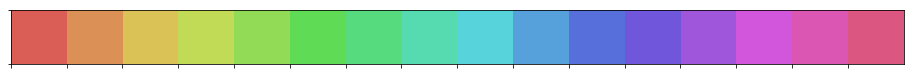

In [82]:
import seaborn as sns
sns.palplot(sns.color_palette("hls", 16))
x = 

In [ ]:
randint()

In [27]:
test = "123"
test.

In [8]:
import pandas as pd
df2 = pd.DataFrame(columns=["community_s", "community_t", "value"])

for node in nodes[2:]:
    
    community_date = []
    community = []
    #print(node.get("s").items())
    community_i = None
    c_d = None
    for i in node.get("s").items():
        community_i = i[1]
        c_d = i[0]
        
        
        if 'community' in c_d:
            #print(i)

            #print(c_d, community_i)
            community_date.append(c_d.replace("community_","").replace("_","-"))
            community.append(community_i)

    #print(community_date)
    #print(community)
    df = pd.DataFrame({'date':community_date,"community":community})
    df = df.sort_values(["date"],ascending=False).reset_index()

    print('-----')
    print(df)
    
    if df.shape[0] > 0:
        d0 = df.date[0]
        c0 = df.community[0]

    for d1,c1 in zip(df.date[1:],df.community[1:]):
        print("Comparing",c0,"|",c1)
        if c0 != c1:
            c_s = str(c0) + ": " + d0
            c_t = str(c1) + ": " + d1

            x = (df2.community_s == c_s) & (df2.community_t == c_t)
            #print(x)
            if 0<x.sum():
                print("updating",c_s,'|',c_t)
                df2["value"][x] += 1
            else:
                print("Creating",c_s,c_t)
                row = pd.DataFrame([[c_s,c_t,1]], columns=["community_s", "community_t", "value"])
                df2 = df2.append(row,sort=True)    

            c0 = c1
            d0 = d1
    
    c_s = str(c0) + ": " + d0
    c_t = str(c1) + ": " + d1
    x = (df2.community_s == c_s) & (df2.community_t == c_t)
    
    if 0<x.sum():
        print("updating (outside)",c_s,'|',c_t)
        df2["value"][x] += 1
    else:
        print("Creating (outside)",c_s,'|',c_t)
        row = pd.DataFrame([[c_s,c_t,1]], columns=["community_s", "community_t", "value"])
        df2 = df2.append(row,sort=True)    
    
    


-----
   index        date  community
0      9  2019-01-31        151
1      5  2018-10-31        151
2      4  2018-07-31        151
3      6  2018-04-30        151
4      7  2018-01-31        151
5      3  2017-10-31        151
6      1  2017-07-31        151
7      2  2017-04-30        151
8      0  2017-01-31        151
9      8  2016-10-31        151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Creating (outside) 151: 2019-01-31 | 151: 2016-10-31
-----
    index        date  community
0      17  2019-01-31        151
1      14  2018-10-31        151
2       4  2018-07-31        151
3      15  2018-04-30        151
4       6  2018-01-31        151
5       5  2017-10-31        151
6       2  2017-07-31        151
7      13  2017-04-30        151
8       3  2017-01-31        151
9      16  2016-10-31        151
10     11  2016-07-31        151
11     

Comparing 0 | 227
Creating 0: 2018-10-31 227: 2018-07-31
Comparing 227 | 3055
Creating 227: 2018-07-31 3055: 2018-04-30
Comparing 3055 | 227
Creating 3055: 2018-04-30 227: 2018-01-31
Comparing 227 | 264
Creating 227: 2018-01-31 264: 2017-10-31
Comparing 264 | 58790
Creating 264: 2017-10-31 58790: 2017-07-31
Comparing 58790 | 58790
Comparing 58790 | 58790
Comparing 58790 | 58790
Comparing 58790 | 58790
Creating (outside) 58790: 2017-07-31 | 58790: 2016-07-31
-----
   index        date  community
0      9  2019-01-31       3055
1      5  2018-10-31        151
2      4  2018-07-31        810
3      6  2018-04-30        810
4      7  2018-01-31        810
5      3  2017-10-31        810
6      1  2017-07-31        810
7      2  2017-04-30        810
8      0  2017-01-31        810
9      8  2016-10-31        264
Comparing 3055 | 151
Creating 3055: 2019-01-31 151: 2018-10-31
Comparing 151 | 810
Creating 151: 2018-10-31 810: 2018-07-31
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 

Creating 269: 2015-04-30 151: 2014-10-31
Creating (outside) 151: 2014-10-31 | 151: 2014-10-31
-----
    index        date  community
0      20  2019-01-31        151
1      15  2018-10-31        151
2       5  2018-07-31        151
3      16  2018-04-30        151
4       6  2018-01-31        151
5       4  2017-10-31        151
6       3  2017-07-31        151
7      14  2017-04-30        151
8       2  2017-01-31        151
9      17  2016-10-31        151
10     12  2016-07-31        151
11      1  2016-04-30        151
12     10  2016-01-31        151
13     13  2015-10-31        151
14      9  2015-07-31        151
15     21  2015-04-30        151
16      8  2015-01-31        151
17      0  2014-10-31        151
18     11  2014-07-31        151
19      7  2014-04-30        151
20     19  2014-01-31          3
21     18  2013-10-31          3
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
C

Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Creating (outside) 151: 2016-07-31 | 151: 2015-07-31
-----
    index        date  community
0      10  2019-01-31        151
1       6  2018-10-31        151
2       4  2018-07-31        151
3       7  2018-04-30          2
4       8  2018-01-31        227
5       5  2017-10-31        227
6       1  2017-07-31        151
7       3  2017-04-30          3
8       2  2017-01-31        151
9       9  2016-10-31        151
10      0  2016-07-31        151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 2
Creating 151: 2019-01-31 2: 2018-04-30
Comparing 2 | 227
Creating 2: 2018-04-30 227: 2018-01-31
Comparing 227 | 227
Comparing 227 | 151
Creating 227: 2018-01-31 151: 2017-07-31
Comparing 151 | 3
Creating 151: 2017-07-31 3: 2017-04-30
Comparing 3 | 151
Creating 3: 2017-04-30 151: 2017-01-31
Comparing 151 | 151
Comparing 151 | 151
Creating (outside) 151: 2017-01-31 | 151: 2016-07-31
-----
   index        d

-----
    index        date  community
0      13  2019-01-31        810
1      10  2018-10-31        810
2       4  2018-07-31        810
3      11  2018-04-30        810
4       5  2018-01-31        810
5       3  2017-10-31        810
6       2  2017-07-31        810
7       9  2017-04-30        810
8       1  2017-01-31        810
9      12  2016-10-31        810
10      7  2016-07-31        810
11      0  2016-04-30        810
12      6  2016-01-31        151
13      8  2015-10-31        589
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 151
updating 810: 2019-01-31 | 151: 2016-01-31
Comparing 151 | 589
Creating 151: 2016-01-31 589: 2015-10-31
Creating (outside) 589: 2015-10-31 | 589: 2015-10-31
-----
    index        date  community
0      10  2019-01-31        151
1       6  2018-10-31        1

Creating (outside) 58790: 2015-01-31 | 58790: 2015-01-31
-----
    index        date  community
0      11  2019-01-31       3055
1       8  2018-10-31        151
2       4  2018-07-31        151
3       9  2018-04-30        151
4       5  2018-01-31        151
5       3  2017-10-31        227
6       2  2017-07-31        264
7       7  2017-04-30        227
8       1  2017-01-31        264
9      10  2016-10-31        264
10      6  2016-07-31        264
11      0  2016-04-30          3
Comparing 3055 | 151
updating 3055: 2019-01-31 | 151: 2018-10-31
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 151
Comparing 151 | 227
Creating 151: 2018-10-31 227: 2017-10-31
Comparing 227 | 264
updating 227: 2017-10-31 | 264: 2017-07-31
Comparing 264 | 227
updating 264: 2017-07-31 | 227: 2017-04-30
Comparing 227 | 264
updating 227: 2017-04-30 | 264: 2017-01-31
Comparing 264 | 264
Comparing 264 | 264
Comparing 264 | 3
Creating 264: 2017-01-31 3: 2016-04-30
Creating (outside) 3: 2016-04-30 | 3

   index        date  community
0      7  2019-01-31        810
1      4  2018-10-31        810
2      2  2018-07-31        810
3      5  2018-04-30        810
4      6  2018-01-31        810
5      3  2017-10-31        810
6      0  2017-07-31        810
7      1  2017-04-30        810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Comparing 810 | 810
Creating (outside) 810: 2019-01-31 | 810: 2017-04-30
-----
   index        date  community
0      6  2019-01-31        227
1      3  2018-10-31        151
2      1  2018-07-31        227
3      4  2018-04-30        227
4      5  2018-01-31        151
5      2  2017-10-31       3180
6      0  2017-07-31       3180
Comparing 227 | 151
Creating 227: 2019-01-31 151: 2018-10-31
Comparing 151 | 227
Creating 151: 2018-10-31 227: 2018-07-31
Comparing 227 | 227
Comparing 227 | 151
Creating 227: 2018-07-31 151: 2018-01-31
Comparing 151 | 3180
Creating 151: 2018-01-31 3180: 20

In [9]:
l = df2.community_s.append(df2.community_t)
xx = pd.DataFrame({"name":list(l.unique())})
xx["index"] = xx.index
xx

,name,index
0,151: 2019-01-31,0
1,227: 2019-01-31,1
2,3055: 2018-07-31,2
3,1: 2019-01-31,3
4,810: 2018-01-31,4
5,264: 2017-10-31,5
6,0: 2019-01-31,6
7,227: 2018-04-30,7
8,3180: 2017-10-31,8
9,94: 2016-01-31,9


In [10]:
df3 = df2.merge(xx,left_on="community_s",right_on="name").drop("name",axis=1).rename(columns={"index":"c_s"})
df4 = df3.merge(xx,left_on="community_t",right_on="name").drop("name",axis=1).rename(columns={"index":"c_t"})
df4[df4.community_s.str.contains("2019")]

,community_s,community_t,value,c_s,c_t
0,151: 2019-01-31,151: 2016-10-31,1,0,96
1,151: 2019-01-31,151: 2014-07-31,2,0,97
4,151: 2019-01-31,151: 2017-07-31,1,0,55
8,151: 2019-01-31,269: 2015-04-30,1,0,51
9,151: 2019-01-31,3: 2014-01-31,1,0,53
11,151: 2019-01-31,264: 2016-10-31,5,0,38
15,151: 2019-01-31,0: 2014-01-31,1,0,66
16,151: 2019-01-31,2: 2018-04-30,2,0,62
17,3055: 2019-01-31,2: 2018-04-30,1,30,62
20,151: 2019-01-31,1096: 2017-10-31,1,0,70


In [11]:
df4.shape

(208, 5)

In [12]:
data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = list(xx['name']),
      #color = ["blue", "red", "green", "pink", "blue", "blue"]
    ),
    link = dict(
      source = list(df4['c_s']),
      target = list(df4['c_t']),
      value = list(df4['value'])
  ))

layout =  dict(
    title = "Basic Sankey Diagram",
    font = dict(
      size = 10
    )
)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

In [104]:
df2 = pd.DataFrame(columns=["community_s", "community_t", "value", "color"])
df2

,community_s,community_t,value,color


In [107]:
dfn = 
dff = df2.append(dfn)
dff

,community_s,community_t,value,color
0,8,2,2,2


,community_s,community_t,value,color
0,8,2,2,2


1